Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ranger


'data.frame':	12083 obs. of  189 variables:
 $ DOEID             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ REGIONC           : int  2 4 1 2 1 2 1 3 1 2 ...
 $ DIVISION          : int  4 10 1 3 1 4 2 5 2 4 ...
 $ REPORTABLE_DOMAIN : int  12 26 1 7 1 10 3 17 5 12 ...
 $ TYPEHUQ           : int  2 2 5 2 3 2 2 2 3 2 ...
 $ NWEIGHT           : num  2472 8599 8970 18004 6000 ...
 $ HDD30YR           : int  4953 2688 5741 5781 5313 8708 5355 1070 5381 4755 ...
 $ CDD30YR           : int  1271 143 829 868 797 436 796 2554 912 1467 ...
 $ Climate_Region_Pub: int  4 5 1 1 1 1 4 3 4 4 ...
 $ AIA_Zone          : int  3 4 2 2 3 1 3 5 3 3 ...
 $ UR                : chr  "U" "U" "U" "U" ...
 $ KOWNRENT          : int  1 2 2 1 1 1 1 1 1 1 ...
 $ CONDCOOP          : int  -2 -2 -2 -2 1 -2 -2 -2 -2 -2 ...
 $ YEARMADERANGE     : int  7 6 3 5 5 1 1 4 1 2 ...
 $ WALLTYPE          : int  1 2 1 6 2 4 3 7 2 3 ...
 $ ROOFTYPE          : int  5 2 -2 5 5 6 6 6 5 6 ...
 $ STUDIO            : int  -2 -2 0 -2 -2 -2 -2 -2 -

     DOEID          REGIONC         DIVISION      REPORTABLEDOMAIN
 Min.   :    1   Min.   :1.000   Min.   : 1.000   Min.   : 1.00   
 1st Qu.: 3022   1st Qu.:2.000   1st Qu.: 3.000   1st Qu.: 8.00   
 Median : 6042   Median :3.000   Median : 5.000   Median :15.00   
 Mean   : 6042   Mean   :2.628   Mean   : 5.373   Mean   :14.78   
 3rd Qu.: 9062   3rd Qu.:3.000   3rd Qu.: 7.000   3rd Qu.:21.00   
 Max.   :12083   Max.   :4.000   Max.   :10.000   Max.   :27.00   
    TYPEHUQ        NWEIGHT           HDD30YR         CDD30YR    
 Min.   :1.00   Min.   :  476.1   Min.   :    0   Min.   :   0  
 1st Qu.:2.00   1st Qu.: 6297.0   1st Qu.: 2224   1st Qu.: 712  
 Median :2.00   Median : 7970.6   Median : 4502   Median :1179  
 Mean   :2.66   Mean   : 9403.0   Mean   : 4135   Mean   :1444  
 3rd Qu.:3.00   3rd Qu.:11330.0   3rd Qu.: 5854   3rd Qu.:1842  
 Max.   :5.00   Max.   :95779.1   Max.   :13346   Max.   :5357  
 ClimateRegionPub    AIAZone           UR               KOWNRENT    
 Min.  

     DOEID          REGIONC         DIVISION      REPORTABLEDOMAIN
 Min.   :    1   Min.   :1.000   Min.   : 1.000   Min.   : 1.00   
 1st Qu.: 3022   1st Qu.:2.000   1st Qu.: 3.000   1st Qu.: 8.00   
 Median : 6042   Median :3.000   Median : 5.000   Median :15.00   
 Mean   : 6042   Mean   :2.628   Mean   : 5.373   Mean   :14.78   
 3rd Qu.: 9062   3rd Qu.:3.000   3rd Qu.: 7.000   3rd Qu.:21.00   
 Max.   :12083   Max.   :4.000   Max.   :10.000   Max.   :27.00   
    TYPEHUQ        NWEIGHT           HDD30YR         CDD30YR    
 Min.   :1.00   Min.   :  476.1   Min.   :    0   Min.   :   0  
 1st Qu.:2.00   1st Qu.: 6297.0   1st Qu.: 2224   1st Qu.: 712  
 Median :2.00   Median : 7970.6   Median : 4502   Median :1179  
 Mean   :2.66   Mean   : 9403.0   Mean   : 4135   Mean   :1444  
 3rd Qu.:3.00   3rd Qu.:11330.0   3rd Qu.: 5854   3rd Qu.:1842  
 Max.   :5.00   Max.   :95779.1   Max.   :13346   Max.   :5357  
 ClimateRegionPub    AIAZone           UR               KOWNRENT    
 Min.  

 1. run of importance source...


Growing trees.. Progress: 86%. Estimated remaining time: 4 seconds.
Computing permutation importance.. Progress: 4%. Estimated remaining time: 11 minutes, 47 seconds.
Computing permutation importance.. Progress: 11%. Estimated remaining time: 8 minutes, 9 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 6 minutes, 6 seconds.
Computing permutation importance.. Progress: 29%. Estimated remaining time: 5 minutes, 14 seconds.
Computing permutation importance.. Progress: 35%. Estimated remaining time: 4 minutes, 46 seconds.
Computing permutation importance.. Progress: 45%. Estimated remaining time: 3 minutes, 52 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 3 minutes, 8 seconds.
Computing permutation importance.. Progress: 63%. Estimated remaining time: 2 minutes, 25 seconds.
Computing permutation importance.. Progress: 75%. Estimated remaining time: 1 minute, 36 seconds.
Computing permutation importance.. Progress: 

 2. run of importance source...


Growing trees.. Progress: 90%. Estimated remaining time: 3 seconds.
Computing permutation importance.. Progress: 6%. Estimated remaining time: 8 minutes, 39 seconds.
Computing permutation importance.. Progress: 13%. Estimated remaining time: 7 minutes, 21 seconds.
Computing permutation importance.. Progress: 20%. Estimated remaining time: 6 minutes, 32 seconds.
Computing permutation importance.. Progress: 27%. Estimated remaining time: 5 minutes, 55 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 5 minutes, 23 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 4 minutes, 49 seconds.
Computing permutation importance.. Progress: 47%. Estimated remaining time: 4 minutes, 14 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 3 minutes, 39 seconds.
Computing permutation importance.. Progress: 61%. Estimated remaining time: 3 minutes, 3 seconds.
Computing permutation importance.. Progress

 3. run of importance source...


Computing permutation importance.. Progress: 7%. Estimated remaining time: 7 minutes, 32 seconds.
Computing permutation importance.. Progress: 14%. Estimated remaining time: 6 minutes, 46 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 7 minutes, 21 seconds.
Computing permutation importance.. Progress: 24%. Estimated remaining time: 6 minutes, 54 seconds.
Computing permutation importance.. Progress: 30%. Estimated remaining time: 6 minutes, 30 seconds.
Computing permutation importance.. Progress: 35%. Estimated remaining time: 6 minutes, 7 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 5 minutes, 44 seconds.
Computing permutation importance.. Progress: 45%. Estimated remaining time: 5 minutes, 11 seconds.
Computing permutation importance.. Progress: 52%. Estimated remaining time: 4 minutes, 26 seconds.
Computing permutation importance.. Progress: 62%. Estimated remaining time: 3 minutes, 19 seconds.
Computing pe

 4. run of importance source...


Growing trees.. Progress: 54%. Estimated remaining time: 26 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 5 minutes, 29 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 4 minutes, 50 seconds.
Computing permutation importance.. Progress: 26%. Estimated remaining time: 4 minutes, 30 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 3 minutes, 44 seconds.
Computing permutation importance.. Progress: 47%. Estimated remaining time: 2 minutes, 55 seconds.
Computing permutation importance.. Progress: 56%. Estimated remaining time: 2 minutes, 26 seconds.
Computing permutation importance.. Progress: 66%. Estimated remaining time: 1 minute, 51 seconds.
Computing permutation importance.. Progress: 78%. Estimated remaining time: 1 minute, 10 seconds.
Computing permutation importance.. Progress: 88%. Estimated remaining time: 39 seconds.
Computing permutation importance.. Progress: 95%. Esti

 5. run of importance source...


Growing trees.. Progress: 74%. Estimated remaining time: 10 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 4 minutes, 58 seconds.
Computing permutation importance.. Progress: 17%. Estimated remaining time: 5 minutes, 11 seconds.
Computing permutation importance.. Progress: 27%. Estimated remaining time: 4 minutes, 11 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 3 minutes, 40 seconds.
Computing permutation importance.. Progress: 43%. Estimated remaining time: 3 minutes, 29 seconds.
Computing permutation importance.. Progress: 50%. Estimated remaining time: 3 minutes, 12 seconds.
Computing permutation importance.. Progress: 56%. Estimated remaining time: 2 minutes, 52 seconds.
Computing permutation importance.. Progress: 62%. Estimated remaining time: 2 minutes, 35 seconds.
Computing permutation importance.. Progress: 68%. Estimated remaining time: 2 minutes, 12 seconds.
Computing permutation importance.. Progre

 6. run of importance source...


Growing trees.. Progress: 68%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 6%. Estimated remaining time: 7 minutes, 33 seconds.
Computing permutation importance.. Progress: 13%. Estimated remaining time: 7 minutes, 8 seconds.
Computing permutation importance.. Progress: 20%. Estimated remaining time: 6 minutes, 20 seconds.
Computing permutation importance.. Progress: 27%. Estimated remaining time: 5 minutes, 50 seconds.
Computing permutation importance.. Progress: 34%. Estimated remaining time: 5 minutes, 14 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 4 minutes, 44 seconds.
Computing permutation importance.. Progress: 47%. Estimated remaining time: 4 minutes, 8 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 3 minutes, 33 seconds.
Computing permutation importance.. Progress: 62%. Estimated remaining time: 2 minutes, 58 seconds.
Computing permutation importance.. Progress

 7. run of importance source...


Growing trees.. Progress: 80%. Estimated remaining time: 7 seconds.
Computing permutation importance.. Progress: 7%. Estimated remaining time: 7 minutes, 32 seconds.
Computing permutation importance.. Progress: 14%. Estimated remaining time: 6 minutes, 39 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 6 minutes, 1 seconds.
Computing permutation importance.. Progress: 28%. Estimated remaining time: 5 minutes, 28 seconds.
Computing permutation importance.. Progress: 35%. Estimated remaining time: 4 minutes, 51 seconds.
Computing permutation importance.. Progress: 43%. Estimated remaining time: 4 minutes, 20 seconds.
Computing permutation importance.. Progress: 50%. Estimated remaining time: 3 minutes, 46 seconds.
Computing permutation importance.. Progress: 57%. Estimated remaining time: 3 minutes, 15 seconds.
Computing permutation importance.. Progress: 64%. Estimated remaining time: 2 minutes, 42 seconds.
Computing permutation importance.. Progress

 8. run of importance source...


Growing trees.. Progress: 83%. Estimated remaining time: 6 seconds.
Computing permutation importance.. Progress: 7%. Estimated remaining time: 7 minutes, 32 seconds.
Computing permutation importance.. Progress: 14%. Estimated remaining time: 6 minutes, 46 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 6 minutes, 8 seconds.
Computing permutation importance.. Progress: 27%. Estimated remaining time: 5 minutes, 47 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 5 minutes, 26 seconds.
Computing permutation importance.. Progress: 39%. Estimated remaining time: 4 minutes, 56 seconds.
Computing permutation importance.. Progress: 46%. Estimated remaining time: 4 minutes, 26 seconds.
Computing permutation importance.. Progress: 51%. Estimated remaining time: 4 minutes, 3 seconds.
Computing permutation importance.. Progress: 57%. Estimated remaining time: 3 minutes, 36 seconds.
Computing permutation importance.. Progress:

 9. run of importance source...


Growing trees.. Progress: 96%. Estimated remaining time: 1 seconds.
Computing permutation importance.. Progress: 6%. Estimated remaining time: 8 minutes, 39 seconds.
Computing permutation importance.. Progress: 13%. Estimated remaining time: 7 minutes, 1 seconds.
Computing permutation importance.. Progress: 24%. Estimated remaining time: 4 minutes, 51 seconds.
Computing permutation importance.. Progress: 35%. Estimated remaining time: 3 minutes, 49 seconds.
Computing permutation importance.. Progress: 47%. Estimated remaining time: 2 minutes, 55 seconds.
Computing permutation importance.. Progress: 59%. Estimated remaining time: 2 minutes, 12 seconds.
Computing permutation importance.. Progress: 70%. Estimated remaining time: 1 minute, 35 seconds.
Computing permutation importance.. Progress: 80%. Estimated remaining time: 1 minute, 1 seconds.
Computing permutation importance.. Progress: 87%. Estimated remaining time: 41 seconds.
Computing permutation importance.. Progress: 94%. Estimat

 10. run of importance source...


Growing trees.. Progress: 73%. Estimated remaining time: 11 seconds.
Computing permutation importance.. Progress: 7%. Estimated remaining time: 6 minutes, 40 seconds.
Computing permutation importance.. Progress: 16%. Estimated remaining time: 5 minutes, 40 seconds.
Computing permutation importance.. Progress: 26%. Estimated remaining time: 4 minutes, 30 seconds.
Computing permutation importance.. Progress: 37%. Estimated remaining time: 3 minutes, 32 seconds.
Computing permutation importance.. Progress: 49%. Estimated remaining time: 2 minutes, 44 seconds.
Computing permutation importance.. Progress: 60%. Estimated remaining time: 2 minutes, 3 seconds.
Computing permutation importance.. Progress: 72%. Estimated remaining time: 1 minute, 25 seconds.
Computing permutation importance.. Progress: 84%. Estimated remaining time: 49 seconds.
Computing permutation importance.. Progress: 95%. Estimated remaining time: 14 seconds.


 11. run of importance source...


Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 45 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 30 seconds.
Computing permutation importance.. Progress: 27%. Estimated remaining time: 4 minutes, 17 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 4 minutes, 21 seconds.
Computing permutation importance.. Progress: 41%. Estimated remaining time: 3 minutes, 51 seconds.
Computing permutation importance.. Progress: 47%. Estimated remaining time: 3 minutes, 34 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 3 minutes, 4 seconds.
Computing permutation importance.. Progress: 63%. Estimated remaining time: 2 minutes, 31 seconds.
Computing permutation importance.. Progress: 71%. Estimated remaining time: 1 minute, 59 seconds.
Computing permutation importance.. Progress: 79%. Estimated remaining time: 1 minute, 26 seconds.
Computing per

 12. run of importance source...


Growing trees.. Progress: 96%. Estimated remaining time: 1 seconds.
Computing permutation importance.. Progress: 8%. Estimated remaining time: 6 minutes, 9 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 5 minutes, 0 seconds.
Computing permutation importance.. Progress: 27%. Estimated remaining time: 4 minutes, 27 seconds.
Computing permutation importance.. Progress: 32%. Estimated remaining time: 4 minutes, 33 seconds.
Computing permutation importance.. Progress: 41%. Estimated remaining time: 3 minutes, 54 seconds.
Computing permutation importance.. Progress: 48%. Estimated remaining time: 3 minutes, 31 seconds.
Computing permutation importance.. Progress: 56%. Estimated remaining time: 2 minutes, 59 seconds.
Computing permutation importance.. Progress: 64%. Estimated remaining time: 2 minutes, 27 seconds.
Computing permutation importance.. Progress: 74%. Estimated remaining time: 1 minute, 44 seconds.
Computing permutation importance.. Progress: 

 13. run of importance source...


Growing trees.. Progress: 55%. Estimated remaining time: 25 seconds.
Computing permutation importance.. Progress: 5%. Estimated remaining time: 9 minutes, 3 seconds.
Computing permutation importance.. Progress: 11%. Estimated remaining time: 8 minutes, 32 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 7 minutes, 9 seconds.
Computing permutation importance.. Progress: 25%. Estimated remaining time: 6 minutes, 12 seconds.
Computing permutation importance.. Progress: 32%. Estimated remaining time: 5 minutes, 37 seconds.
Computing permutation importance.. Progress: 39%. Estimated remaining time: 4 minutes, 54 seconds.
Computing permutation importance.. Progress: 47%. Estimated remaining time: 4 minutes, 4 seconds.
Computing permutation importance.. Progress: 59%. Estimated remaining time: 2 minutes, 58 seconds.
Computing permutation importance.. Progress: 64%. Estimated remaining time: 2 minutes, 36 seconds.
Computing permutation importance.. Progress:

 14. run of importance source...


Growing trees.. Progress: 79%. Estimated remaining time: 8 seconds.
Computing permutation importance.. Progress: 7%. Estimated remaining time: 7 minutes, 18 seconds.
Computing permutation importance.. Progress: 15%. Estimated remaining time: 6 minutes, 2 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 5 minutes, 45 seconds.
Computing permutation importance.. Progress: 28%. Estimated remaining time: 5 minutes, 27 seconds.
Computing permutation importance.. Progress: 34%. Estimated remaining time: 4 minutes, 57 seconds.
Computing permutation importance.. Progress: 41%. Estimated remaining time: 4 minutes, 24 seconds.
Computing permutation importance.. Progress: 48%. Estimated remaining time: 3 minutes, 53 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 3 minutes, 27 seconds.
Computing permutation importance.. Progress: 60%. Estimated remaining time: 3 minutes, 4 seconds.
Computing permutation importance.. Progress:

 15. run of importance source...


Growing trees.. Progress: 72%. Estimated remaining time: 11 seconds.
Computing permutation importance.. Progress: 7%. Estimated remaining time: 7 minutes, 32 seconds.
Computing permutation importance.. Progress: 14%. Estimated remaining time: 6 minutes, 33 seconds.
Computing permutation importance.. Progress: 20%. Estimated remaining time: 6 minutes, 15 seconds.
Computing permutation importance.. Progress: 27%. Estimated remaining time: 5 minutes, 50 seconds.
Computing permutation importance.. Progress: 31%. Estimated remaining time: 5 minutes, 53 seconds.
Computing permutation importance.. Progress: 35%. Estimated remaining time: 5 minutes, 57 seconds.
Computing permutation importance.. Progress: 39%. Estimated remaining time: 6 minutes, 4 seconds.
Computing permutation importance.. Progress: 42%. Estimated remaining time: 6 minutes, 7 seconds.
Computing permutation importance.. Progress: 44%. Estimated remaining time: 6 minutes, 13 seconds.
Computing permutation importance.. Progress

After 15 iterations, +2 hours: 
 rejected 122 attributes: AGEAUD, AGECENAC, AGECWASH, AGEDW, AGEHHMEMCAT11 and 117 more;
 still have 65 attributes left.

 16. run of importance source...


Computing permutation importance.. Progress: 24%. Estimated remaining time: 1 minute, 37 seconds.
Computing permutation importance.. Progress: 47%. Estimated remaining time: 1 minute, 10 seconds.
Computing permutation importance.. Progress: 72%. Estimated remaining time: 36 seconds.
Computing permutation importance.. Progress: 97%. Estimated remaining time: 4 seconds.


 17. run of importance source...


Computing permutation importance.. Progress: 25%. Estimated remaining time: 1 minute, 34 seconds.
Computing permutation importance.. Progress: 49%. Estimated remaining time: 1 minute, 4 seconds.
Computing permutation importance.. Progress: 70%. Estimated remaining time: 39 seconds.
Computing permutation importance.. Progress: 97%. Estimated remaining time: 3 seconds.


 18. run of importance source...


Computing permutation importance.. Progress: 22%. Estimated remaining time: 1 minute, 49 seconds.
Computing permutation importance.. Progress: 46%. Estimated remaining time: 1 minute, 12 seconds.
Computing permutation importance.. Progress: 82%. Estimated remaining time: 20 seconds.


 19. run of importance source...


Computing permutation importance.. Progress: 35%. Estimated remaining time: 56 seconds.
Computing permutation importance.. Progress: 71%. Estimated remaining time: 24 seconds.


After 19 iterations, +2.1 hours: 
 confirmed 3 attributes: KWHOTH, TOTHSQFT, TOTSQFT;
 rejected 19 attributes: AGEHHMEMCAT2, AIRCOND, AMTMICRO, ATHOME, COMPUTER and 14 more;
 still have 43 attributes left.

 20. run of importance source...


Computing permutation importance.. Progress: 43%. Estimated remaining time: 40 seconds.
Computing permutation importance.. Progress: 83%. Estimated remaining time: 12 seconds.


 21. run of importance source...


Computing permutation importance.. Progress: 32%. Estimated remaining time: 1 minute, 6 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 52 seconds.
Computing permutation importance.. Progress: 74%. Estimated remaining time: 32 seconds.
Computing permutation importance.. Progress: 94%. Estimated remaining time: 8 seconds.


 22. run of importance source...


Growing trees.. Progress: 78%. Estimated remaining time: 8 seconds.
Computing permutation importance.. Progress: 35%. Estimated remaining time: 58 seconds.
Computing permutation importance.. Progress: 82%. Estimated remaining time: 13 seconds.


 23. run of importance source...


Computing permutation importance.. Progress: 41%. Estimated remaining time: 44 seconds.
Computing permutation importance.. Progress: 75%. Estimated remaining time: 20 seconds.


After 23 iterations, +2.3 hours: 
 confirmed 1 attribute: TOTCSQFT;
 rejected 4 attributes: AGECDRYER, ELFOOD, OTHROOMS, PELAC;
 still have 38 attributes left.

 24. run of importance source...


Computing permutation importance.. Progress: 39%. Estimated remaining time: 48 seconds.
Computing permutation importance.. Progress: 94%. Estimated remaining time: 4 seconds.


 25. run of importance source...


Computing permutation importance.. Progress: 56%. Estimated remaining time: 24 seconds.


 26. run of importance source...


Computing permutation importance.. Progress: 33%. Estimated remaining time: 1 minute, 2 seconds.
Computing permutation importance.. Progress: 75%. Estimated remaining time: 21 seconds.


After 26 iterations, +2.3 hours: 
 rejected 2 attributes: DOLELSPH, ROOFTYPE;
 still have 36 attributes left.

 27. run of importance source...


Computing permutation importance.. Progress: 59%. Estimated remaining time: 21 seconds.


 28. run of importance source...


Computing permutation importance.. Progress: 68%. Estimated remaining time: 14 seconds.


 29. run of importance source...


Computing permutation importance.. Progress: 63%. Estimated remaining time: 18 seconds.


After 29 iterations, +2.4 hours: 
 confirmed 1 attribute: DOLELCOL;
 still have 35 attributes left.

 30. run of importance source...


Computing permutation importance.. Progress: 52%. Estimated remaining time: 28 seconds.
Computing permutation importance.. Progress: 88%. Estimated remaining time: 8 seconds.


 31. run of importance source...


Computing permutation importance.. Progress: 52%. Estimated remaining time: 29 seconds.


 32. run of importance source...


Computing permutation importance.. Progress: 41%. Estimated remaining time: 44 seconds.
Computing permutation importance.. Progress: 99%. Estimated remaining time: 0 seconds.


 33. run of importance source...


Computing permutation importance.. Progress: 60%. Estimated remaining time: 21 seconds.


After 33 iterations, +2.5 hours: 
 confirmed 2 attributes: KWH, KWHCOL;
 rejected 1 attribute: PCPRINT;
 still have 32 attributes left.

 34. run of importance source...


Computing permutation importance.. Progress: 58%. Estimated remaining time: 22 seconds.


 35. run of importance source...


Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 36. run of importance source...


Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.


After 36 iterations, +2.6 hours: 
 confirmed 1 attribute: DOLELOTH;
 still have 31 attributes left.

 37. run of importance source...


Computing permutation importance.. Progress: 63%. Estimated remaining time: 18 seconds.


 38. run of importance source...


Computing permutation importance.. Progress: 54%. Estimated remaining time: 26 seconds.


 39. run of importance source...


Computing permutation importance.. Progress: 58%. Estimated remaining time: 22 seconds.


 40. run of importance source...


Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.


 41. run of importance source...


Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.


 42. run of importance source...


Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 43. run of importance source...


Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 44. run of importance source...


Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.


After 44 iterations, +2.8 hours: 
 rejected 1 attribute: TEMPHOME;
 still have 30 attributes left.

 45. run of importance source...


Computing permutation importance.. Progress: 60%. Estimated remaining time: 20 seconds.


 46. run of importance source...


Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 47. run of importance source...


Computing permutation importance.. Progress: 49%. Estimated remaining time: 32 seconds.
Computing permutation importance.. Progress: 98%. Estimated remaining time: 1 seconds.


After 47 iterations, +3 hours: 
 confirmed 2 attributes: HEATROOM, KWHRFG;
 still have 28 attributes left.

 48. run of importance source...


Computing permutation importance.. Progress: 55%. Estimated remaining time: 24 seconds.


 49. run of importance source...


Computing permutation importance.. Progress: 69%. Estimated remaining time: 13 seconds.


 50. run of importance source...


Computing permutation importance.. Progress: 52%. Estimated remaining time: 28 seconds.


After 50 iterations, +3 hours: 
 confirmed 2 attributes: DOLELRFG, TOTROOMS;
 still have 26 attributes left.

 51. run of importance source...


Computing permutation importance.. Progress: 73%. Estimated remaining time: 11 seconds.


 52. run of importance source...


Computing permutation importance.. Progress: 65%. Estimated remaining time: 16 seconds.


 53. run of importance source...


Computing permutation importance.. Progress: 65%. Estimated remaining time: 16 seconds.


 54. run of importance source...


Computing permutation importance.. Progress: 75%. Estimated remaining time: 10 seconds.


 55. run of importance source...


Computing permutation importance.. Progress: 69%. Estimated remaining time: 13 seconds.


 56. run of importance source...


Computing permutation importance.. Progress: 69%. Estimated remaining time: 13 seconds.


 57. run of importance source...


Computing permutation importance.. Progress: 75%. Estimated remaining time: 10 seconds.


 58. run of importance source...


Computing permutation importance.. Progress: 74%. Estimated remaining time: 11 seconds.


After 58 iterations, +6.6 hours: 
 confirmed 1 attribute: ACROOMS;
 rejected 1 attribute: WELLPUMP;
 still have 24 attributes left.

 59. run of importance source...


Computing permutation importance.. Progress: 79%. Estimated remaining time: 8 seconds.


 60. run of importance source...


Computing permutation importance.. Progress: 78%. Estimated remaining time: 8 seconds.


 61. run of importance source...


Computing permutation importance.. Progress: 79%. Estimated remaining time: 8 seconds.


 62. run of importance source...


Computing permutation importance.. Progress: 79%. Estimated remaining time: 8 seconds.


 63. run of importance source...


Computing permutation importance.. Progress: 73%. Estimated remaining time: 11 seconds.


 64. run of importance source...


Computing permutation importance.. Progress: 58%. Estimated remaining time: 22 seconds.


After 64 iterations, +7.4 hours: 
 confirmed 2 attributes: CDD30YR, HDD30YR;
 still have 22 attributes left.

 65. run of importance source...


Computing permutation importance.. Progress: 81%. Estimated remaining time: 7 seconds.


 66. run of importance source...


Computing permutation importance.. Progress: 78%. Estimated remaining time: 8 seconds.


 67. run of importance source...


Computing permutation importance.. Progress: 72%. Estimated remaining time: 11 seconds.


 68. run of importance source...


Computing permutation importance.. Progress: 73%. Estimated remaining time: 11 seconds.


 69. run of importance source...


Computing permutation importance.. Progress: 51%. Estimated remaining time: 30 seconds.


After 69 iterations, +8.1 hours: 
 confirmed 1 attribute: BEDROOMS;
 rejected 1 attribute: SWIMPOOL;
 still have 20 attributes left.

 70. run of importance source...


Computing permutation importance.. Progress: 81%. Estimated remaining time: 7 seconds.


 71. run of importance source...


Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.


 72. run of importance source...


Computing permutation importance.. Progress: 78%. Estimated remaining time: 8 seconds.


 73. run of importance source...


Computing permutation importance.. Progress: 76%. Estimated remaining time: 9 seconds.


 74. run of importance source...


Computing permutation importance.. Progress: 79%. Estimated remaining time: 8 seconds.


 75. run of importance source...


Computing permutation importance.. Progress: 81%. Estimated remaining time: 7 seconds.


 76. run of importance source...


Computing permutation importance.. Progress: 61%. Estimated remaining time: 20 seconds.


 77. run of importance source...


Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 78. run of importance source...


Computing permutation importance.. Progress: 79%. Estimated remaining time: 8 seconds.


 79. run of importance source...


Computing permutation importance.. Progress: 72%. Estimated remaining time: 11 seconds.


 80. run of importance source...


Computing permutation importance.. Progress: 80%. Estimated remaining time: 7 seconds.


 81. run of importance source...


Computing permutation importance.. Progress: 76%. Estimated remaining time: 9 seconds.


 82. run of importance source...


Computing permutation importance.. Progress: 80%. Estimated remaining time: 7 seconds.


 83. run of importance source...


Computing permutation importance.. Progress: 86%. Estimated remaining time: 5 seconds.


 84. run of importance source...


Computing permutation importance.. Progress: 80%. Estimated remaining time: 7 seconds.


 85. run of importance source...


Computing permutation importance.. Progress: 52%. Estimated remaining time: 29 seconds.


After 85 iterations, +10 hours: 
 confirmed 2 attributes: TEMPNITEAC, TOTUCSQFT;
 still have 18 attributes left.

 86. run of importance source...


Computing permutation importance.. Progress: 81%. Estimated remaining time: 7 seconds.


 87. run of importance source...


Computing permutation importance.. Progress: 79%. Estimated remaining time: 8 seconds.


 88. run of importance source...


Computing permutation importance.. Progress: 81%. Estimated remaining time: 7 seconds.


 89. run of importance source...


Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.


 90. run of importance source...


Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.


 91. run of importance source...


Computing permutation importance.. Progress: 77%. Estimated remaining time: 9 seconds.


 92. run of importance source...


Computing permutation importance.. Progress: 80%. Estimated remaining time: 7 seconds.


 93. run of importance source...


Computing permutation importance.. Progress: 76%. Estimated remaining time: 9 seconds.


 94. run of importance source...


Computing permutation importance.. Progress: 53%. Estimated remaining time: 27 seconds.


 95. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


After 95 iterations, +20 hours: 
 confirmed 1 attribute: NCOMBATH;
 still have 17 attributes left.

 96. run of importance source...


Computing permutation importance.. Progress: 62%. Estimated remaining time: 18 seconds.


 97. run of importance source...


Computing permutation importance.. Progress: 31%. Estimated remaining time: 1 minute, 7 seconds.
Computing permutation importance.. Progress: 63%. Estimated remaining time: 36 seconds.
Computing permutation importance.. Progress: 91%. Estimated remaining time: 9 seconds.


After 97 iterations, +20 hours: 
 confirmed 1 attribute: TYPEHUQ;
 still have 16 attributes left.

 98. run of importance source...


Computing permutation importance.. Progress: 39%. Estimated remaining time: 48 seconds.
Computing permutation importance.. Progress: 87%. Estimated remaining time: 9 seconds.


 99. run of importance source...


Computing permutation importance.. Progress: 48%. Estimated remaining time: 33 seconds.
Boruta performed 99 iterations in 20.14382 hours.
 20 attributes confirmed important: ACROOMS, BEDROOMS, CDD30YR,
DOLELCOL, DOLELOTH and 15 more;
 151 attributes confirmed unimportant: AGEAUD, AGECDRYER, AGECENAC,
AGECWASH, AGEDW and 146 more;
 16 tentative attributes left: BASEFIN, CELLAR, DOLELWTH, DWASHUSE,
KWHWTH and 11 more;
Boruta performed 99 iterations in 20.14382 hours.
Tentatives roughfixed over the last 99 iterations.
 23 attributes confirmed important: ACROOMS, BEDROOMS, CDD30YR,
DOLELCOL, DOLELOTH and 18 more;
 164 attributes confirmed unimportant: AGEAUD, AGECDRYER, AGECENAC,
AGECWASH, AGEDW and 159 more;


[1] "TYPEHUQ"    "HDD30YR"    "CDD30YR"    "BEDROOMS"   "NCOMBATH"  
 [6] "TOTROOMS"   "DWASHUSE"   "HEATROOM"   "ACROOMS"    "TEMPGONEAC"
[11] "TEMPNITEAC" "TOTSQFT"    "TOTHSQFT"   "TOTCSQFT"   "TOTUCSQFT" 
[16] "KWH"        "KWHCOL"     "KWHWTH"     "KWHRFG"     "KWHOTH"    
[21] "DOLELCOL"   "DOLELRFG"   "DOLELOTH"

[1] "data.frame"

                      meanImp    medianImp      minImp     maxImp   normHits
REGIONC           0.581056511  0.678402177 -0.41438908  1.4018021 0.00000000
DIVISION          0.693367611  0.773730160 -1.61661783  2.2554684 0.00000000
REPORTABLEDOMAIN  0.621247916  0.589335521 -2.00572148  3.2695426 0.00000000
TYPEHUQ           2.972452569  3.052503336 -1.32295401  5.4280818 0.70707071
NWEIGHT           2.467417649  2.535804086  0.24218155  5.9657590 0.52525253
HDD30YR           3.742795628  3.821313391 -0.59513730  6.8691177 0.82828283
CDD30YR           3.456093915  3.548538966 -1.36378565  5.6986230 0.81818182
ClimateRegionPub  0.830412853  0.793305513 -2.16142772  2.3869689 0.00000000
AIAZone           0.744763384  0.776077145 -1.36447404  2.0600318 0.00000000
UR                0.157181350  0.180892211 -1.29724731  2.0123977 0.00000000
KOWNRENT          1.123612280  1.354925791 -1.70418186  2.1226004 0.00000000
CONDCOOP         -0.010574675  0.223049852 -1.82439699  1.4414060 0.00000000

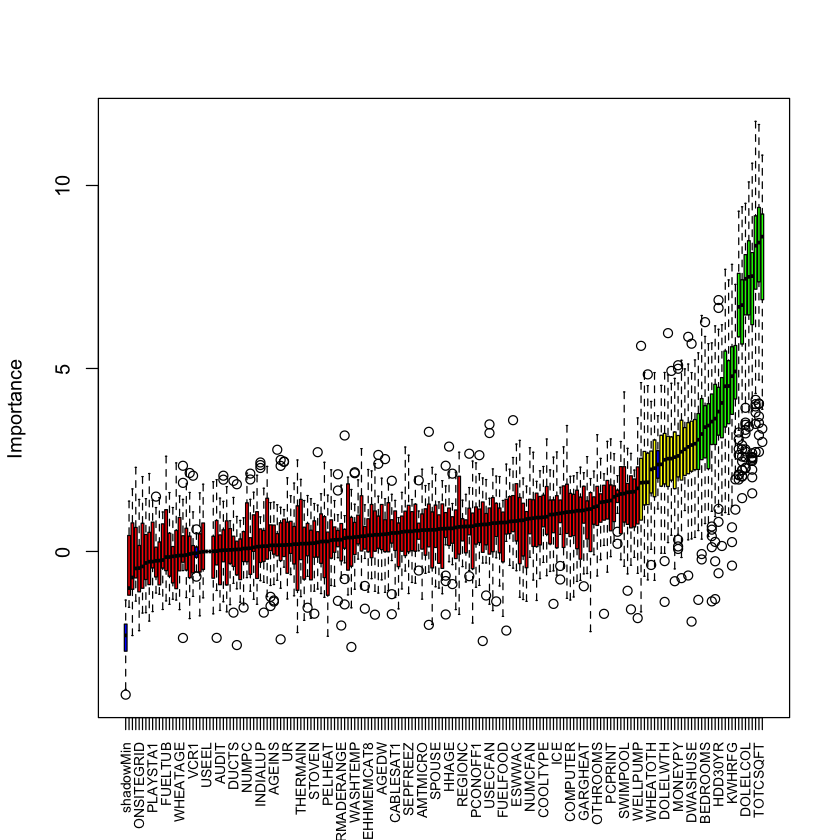

In [1]:
#installing Boruta library
install.packages("Boruta")
#calling Boruta
library(Boruta)

#setting working directory
setwd("/Users/Ankith/Documents/Residential_Electricity_Consuption_Machine_Learning_Project")
#loading data set for training
traindata <- read.csv("output.csv", header = T, stringsAsFactors = F) 

#taking a look at the data
str(traindata)
#gsub() is used to replace one expression with another. Here, underscores are replaced with blank.
names(traindata) <- gsub("_", "", names(traindata))

#checking dataset for missing values
summary(traindata)

#replacing blank cells with NA
traindata[traindata == ""] <- NA
#list wise deletion method is used
traindata <- traindata[complete.cases(traindata),]
#checking for missing values again
summary(traindata)

#implementing the algorithm
set.seed(123)
boruta.train <- Boruta(DOEID~.-DOLLAREL, data = traindata, doTrace = 2)
print(boruta.train)

#plotting the boruta variable importance chart
#attributes are added to x-axis vertically
plot(boruta.train, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(boruta.train$ImpHistory),function(i)
boruta.train$ImpHistory[is.finite(boruta.train$ImpHistory[,i]),i])
names(lz) <- colnames(boruta.train$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels), at = 1:ncol(boruta.train$ImpHistory), cex.axis = 0.7)

#Red box represents rejected attributes
#Yellow box represents tentative attributes
#Green box represents confirmed attributes
#Blue box represents minimum, average and maximum score of shadow attributes.

#Taking decision on tentative attributes based on median score of attribute
final.boruta <- TentativeRoughFix(boruta.train)
print(final.boruta)

#list of all confirmed attributes
getSelectedAttributes(final.boruta, withTentative = F)

#final results obtained using Boruta in a data frame
boruta.df <- attStats(final.boruta)
class(boruta.df)
print(boruta.df)
           
    